<a href="https://colab.research.google.com/github/desantamaria/Brain-Tumor-Classification/blob/main/Brain_Tumor_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
! kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset --unzip

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
 98% 146M/149M [00:02<00:00, 62.0MB/s]
100% 149M/149M [00:02<00:00, 62.2MB/s]


In [ ]:
def get_class_paths(path):
  classes = []
  class_paths = []

  # Iterate through directories in the training path
  for label in os.listdir(path):
    label_path = os.path.join(path, label)

    # Check if it's a directory
    if os.path.isdir(label_path):
      # Iterate through images in the label directory
      for image in os.listdir(label_path):
        image_path = os.path.join(label_path, image)

        # Add class and path to respective lists
        classes.append(label)
        class_paths.append(image_path)

  # Create a DataFrame with the collected data
  df = pd.DataFrame({
      'Class Path': class_paths,
      'Class': classes
  })

  return df

In [ ]:
tr_df = get_class_paths("/content/Training")

In [ ]:
tr_df

,Class Path,Class
0,/content/Training/glioma/Tr-gl_0038.jpg,glioma
1,/content/Training/glioma/Tr-gl_0358.jpg,glioma
2,/content/Training/glioma/Tr-gl_0132.jpg,glioma
3,/content/Training/glioma/Tr-gl_0459.jpg,glioma
4,/content/Training/glioma/Tr-gl_0155.jpg,glioma
...,...,...
5707,/content/Training/meningioma/Tr-me_0411.jpg,meningioma
5708,/content/Training/meningioma/Tr-me_0606.jpg,meningioma
5709,/content/Training/meningioma/Tr-me_0729.jpg,meningioma
5710,/content/Training/meningioma/Tr-me_1110.jpg,meningioma


In [ ]:
ts_df = get_class_paths("/content/Testing")

In [ ]:
ts_df

,Class Path,Class
0,/content/Testing/glioma/Te-gl_0268.jpg,glioma
1,/content/Testing/glioma/Te-gl_0264.jpg,glioma
2,/content/Testing/glioma/Te-gl_0291.jpg,glioma
3,/content/Testing/glioma/Te-gl_0015.jpg,glioma
4,/content/Testing/glioma/Te-gl_0267.jpg,glioma
...,...,...
1306,/content/Testing/meningioma/Te-me_0050.jpg,meningioma
1307,/content/Testing/meningioma/Te-me_0150.jpg,meningioma
1308,/content/Testing/meningioma/Te-me_0061.jpg,meningioma
1309,/content/Testing/meningioma/Te-me_0278.jpg,meningioma


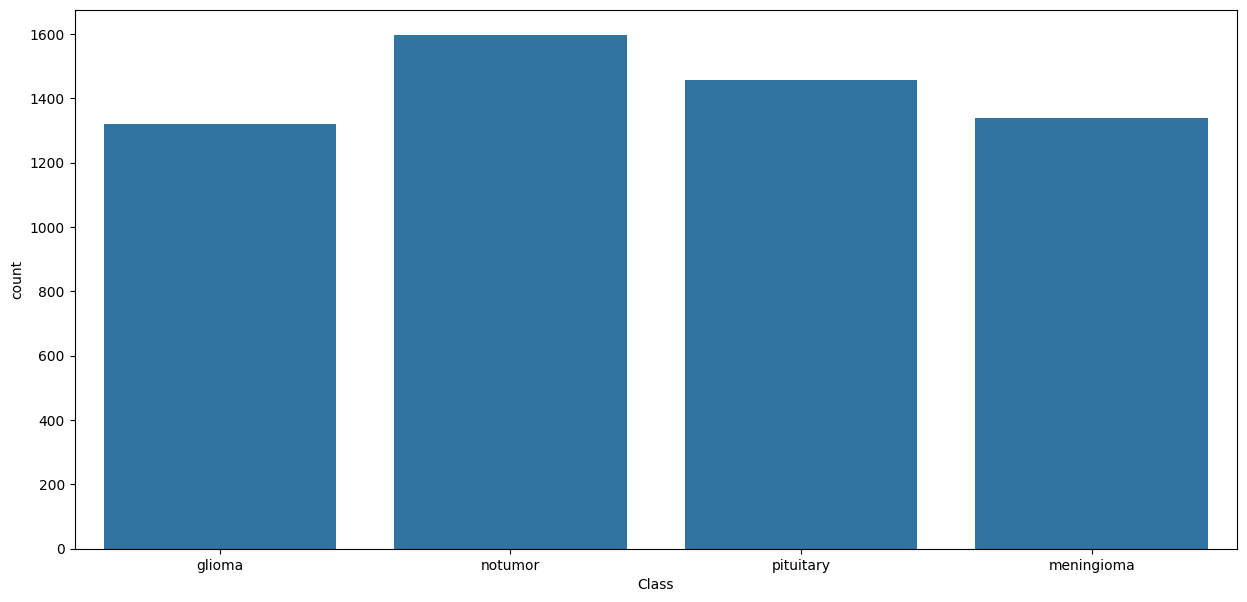

In [ ]:
plt.figure(figsize=(15, 7))
ax = sns.countplot(data=tr_df, x=tr_df['Class'])

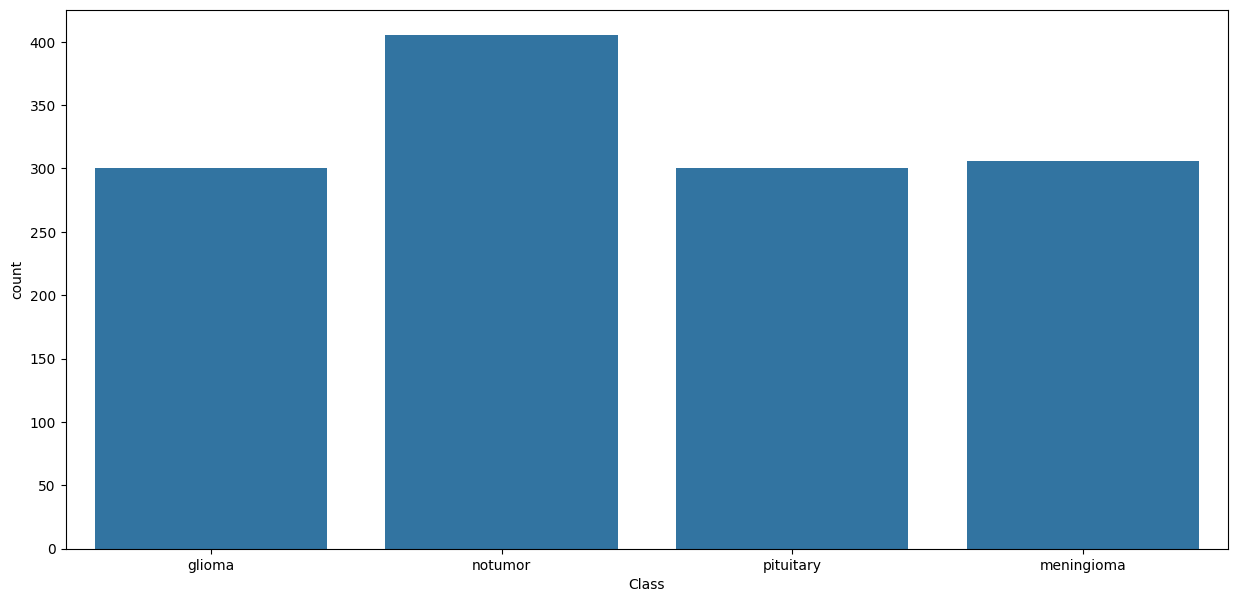

In [ ]:
plt.figure(figsize=(15, 7))
ax = sns.countplot(data=ts_df, x=ts_df['Class'])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
valid_df, ts_df = train_test_split(ts_df, train_size=0.5, stratify=ts_df['Class'])

In [ ]:
valid_df

,Class Path,Class
1235,/content/Testing/meningioma/Te-me_0028.jpg,meningioma
1159,/content/Testing/meningioma/Te-me_0190.jpg,meningioma
641,/content/Testing/notumor/Te-no_0308.jpg,notumor
358,/content/Testing/notumor/Te-no_0042.jpg,notumor
1244,/content/Testing/meningioma/Te-me_0066.jpg,meningioma
...,...,...
525,/content/Testing/notumor/Te-no_0089.jpg,notumor
735,/content/Testing/pituitary/Te-pi_0018.jpg,pituitary
1254,/content/Testing/meningioma/Te-me_0176.jpg,meningioma
1227,/content/Testing/meningioma/Te-me_0175.jpg,meningioma


In [ ]:
ts_df

,Class Path,Class
111,/content/Testing/glioma/Te-gl_0196.jpg,glioma
139,/content/Testing/glioma/Te-gl_0147.jpg,glioma
782,/content/Testing/pituitary/Te-pi_0139.jpg,pituitary
783,/content/Testing/pituitary/Te-pi_0131.jpg,pituitary
425,/content/Testing/notumor/Te-no_0192.jpg,notumor
...,...,...
113,/content/Testing/glioma/Te-gl_0042.jpg,glioma
451,/content/Testing/notumor/Te-no_0079.jpg,notumor
822,/content/Testing/pituitary/Te-pi_0190.jpg,pituitary
1251,/content/Testing/meningioma/Te-me_0275.jpg,meningioma


In [ ]:
# Standardize Image Size and Brightness to improve consistency.
batch_size = 32

img_size = (299, 299)

image_generator = ImageDataGenerator(rescale=1/255, brightness_range=(0.8, 1.2))

ts_gen = ImageDataGenerator(rescale=1/255)

In [ ]:
# Takes Traning DF and creates flow of images from DF
tr_gen = image_generator.flow_from_dataframe(
    tr_df,
    x_col='Class Path',
    y_col='Class',
    batch_size=batch_size,
    target_size=img_size
)

# Keeping order of Testing Data consistent
ts_gen = ts_gen.flow_from_dataframe(
    ts_df,
    x_col='Class Path',
    y_col='Class',
    batch_size=16,
    target_size=img_size,
    shuffle=False
)

valid_gen = image_generator.flow_from_dataframe(
    valid_df,
    x_col='Class Path',
    y_col='Class',
    batch_size=batch_size,
    target_size=img_size
)

Found 5712 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.


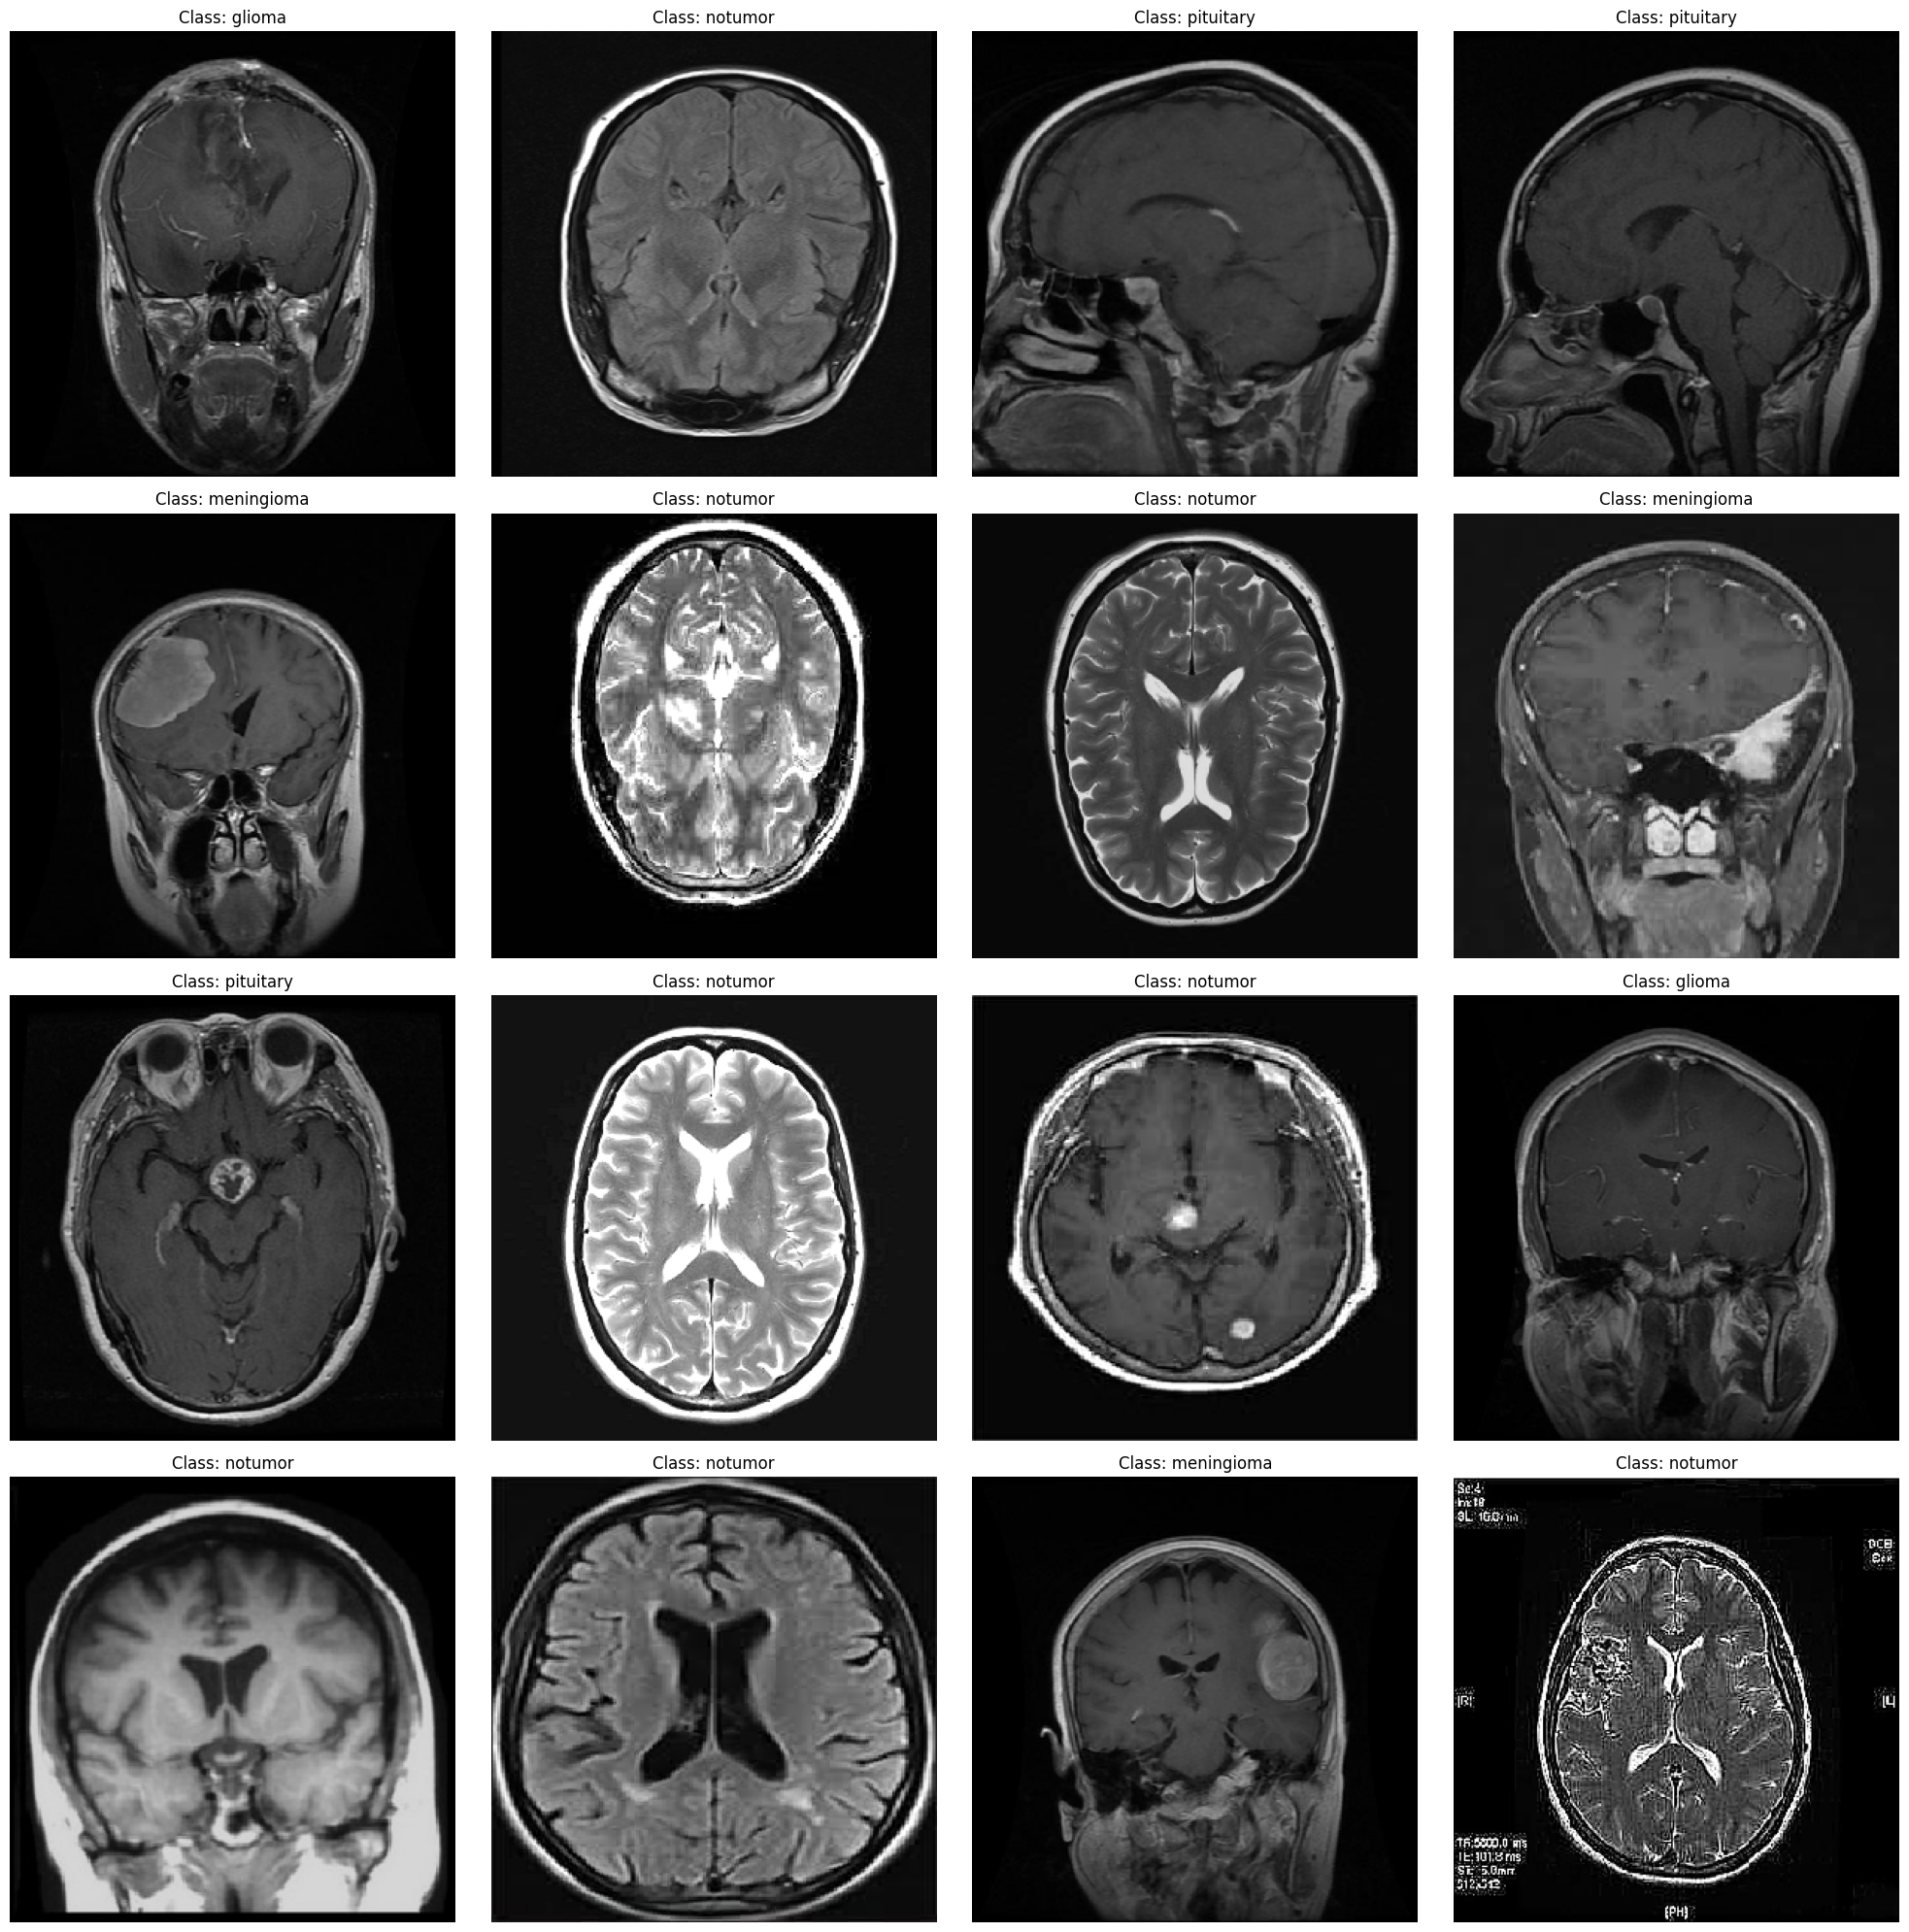

In [ ]:
# Create 4 x 4 Grid of Subplots to explain image in tr_gen
plt.figure(figsize=(20, 20))
for i in range(16):
  plt.subplot(4, 4, i+1)
  batch = next(tr_gen)
  image = batch[0][0]
  label = batch[1][0]
  plt.imshow(image)

  # Get the class index
  class_index = np.argmax(label)

  # Get the list of class names and class indices
  class_names = list(tr_gen.class_indices.keys())
  class_indices = list(tr_gen.class_indices.values())

  # Find the index of the class_index in the list of indices
  index_position = class_indices.index(class_index)

  # Get the class name using the index position
  class_name = class_names[index_position]

  plt.title(f"Class: {class_name}")
  plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
img_shape = (299, 299, 3)

base_model = tf.keras.applications.Xception(
    include_top=False,
    weights='imagenet',
    input_shape=img_shape,
    pooling='max'
)

# Add layers to base model
model = Sequential([
    base_model,
    Flatten(),
    # Dropout layers to prevent overfitting
    Dropout(rate=0.3),
    # Type of function used for Deep learning for non linear relationships
    Dense(128, activation='relu'),
    Dropout(rate=0.25),
    # Softmax used for classificaiton often used in last layer
    Dense(4, activation='softmax')
])

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
# Adamax assist with learning steps that model makes in training
model.compile(Adamax(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy', Precision(), Recall()])

In [ ]:
# Train Model to Classify MRI Scans
hist = model.fit(
    tr_gen,
    # Model will go through tr set 5 times and update weights accordingly
    epochs=5,
    validation_data=valid_gen
)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


179/179 ━━━━━━━━━━━━━━━━━━━━ 266s 1s/step - accuracy: 0.7713 - loss: 0.6780 - precision: 0.8444 - recall: 0.6725 - val_accuracy: 0.9573 - val_loss: 0.1482 - val_precision: 0.9601 - val_recall: 0.9557
Epoch 2/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 136s 755ms/step - accuracy: 0.9796 - loss: 0.0667 - precision: 0.9807 - recall: 0.9783 - val_accuracy: 0.9527 - val_loss: 0.1431 - val_precision: 0.9554 - val_recall: 0.9481
Epoch 3/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 142s 756ms/step - accuracy: 0.9860 - loss: 0.0455 - precision: 0.9863 - recall: 0.9852 - val_accuracy: 0.9832 - val_loss: 0.0849 - val_precision: 0.9832 - val_recall: 0.9832
Epoch 4/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 137s 760ms/step - accuracy: 0.9951 - loss: 0.0189 - precision: 0.9962 - recall: 0.9949 - val_accuracy: 0.9924 - val_loss: 0.0331 - val_precision: 0.9924 - val_recall: 0.9924
Epoch 5/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 142s 759ms/step - accuracy: 0.9960 - loss: 0.0146 - precision: 0.9964 - recall: 0.9958 - val_accuracy: 0.9939 - val_loss: 

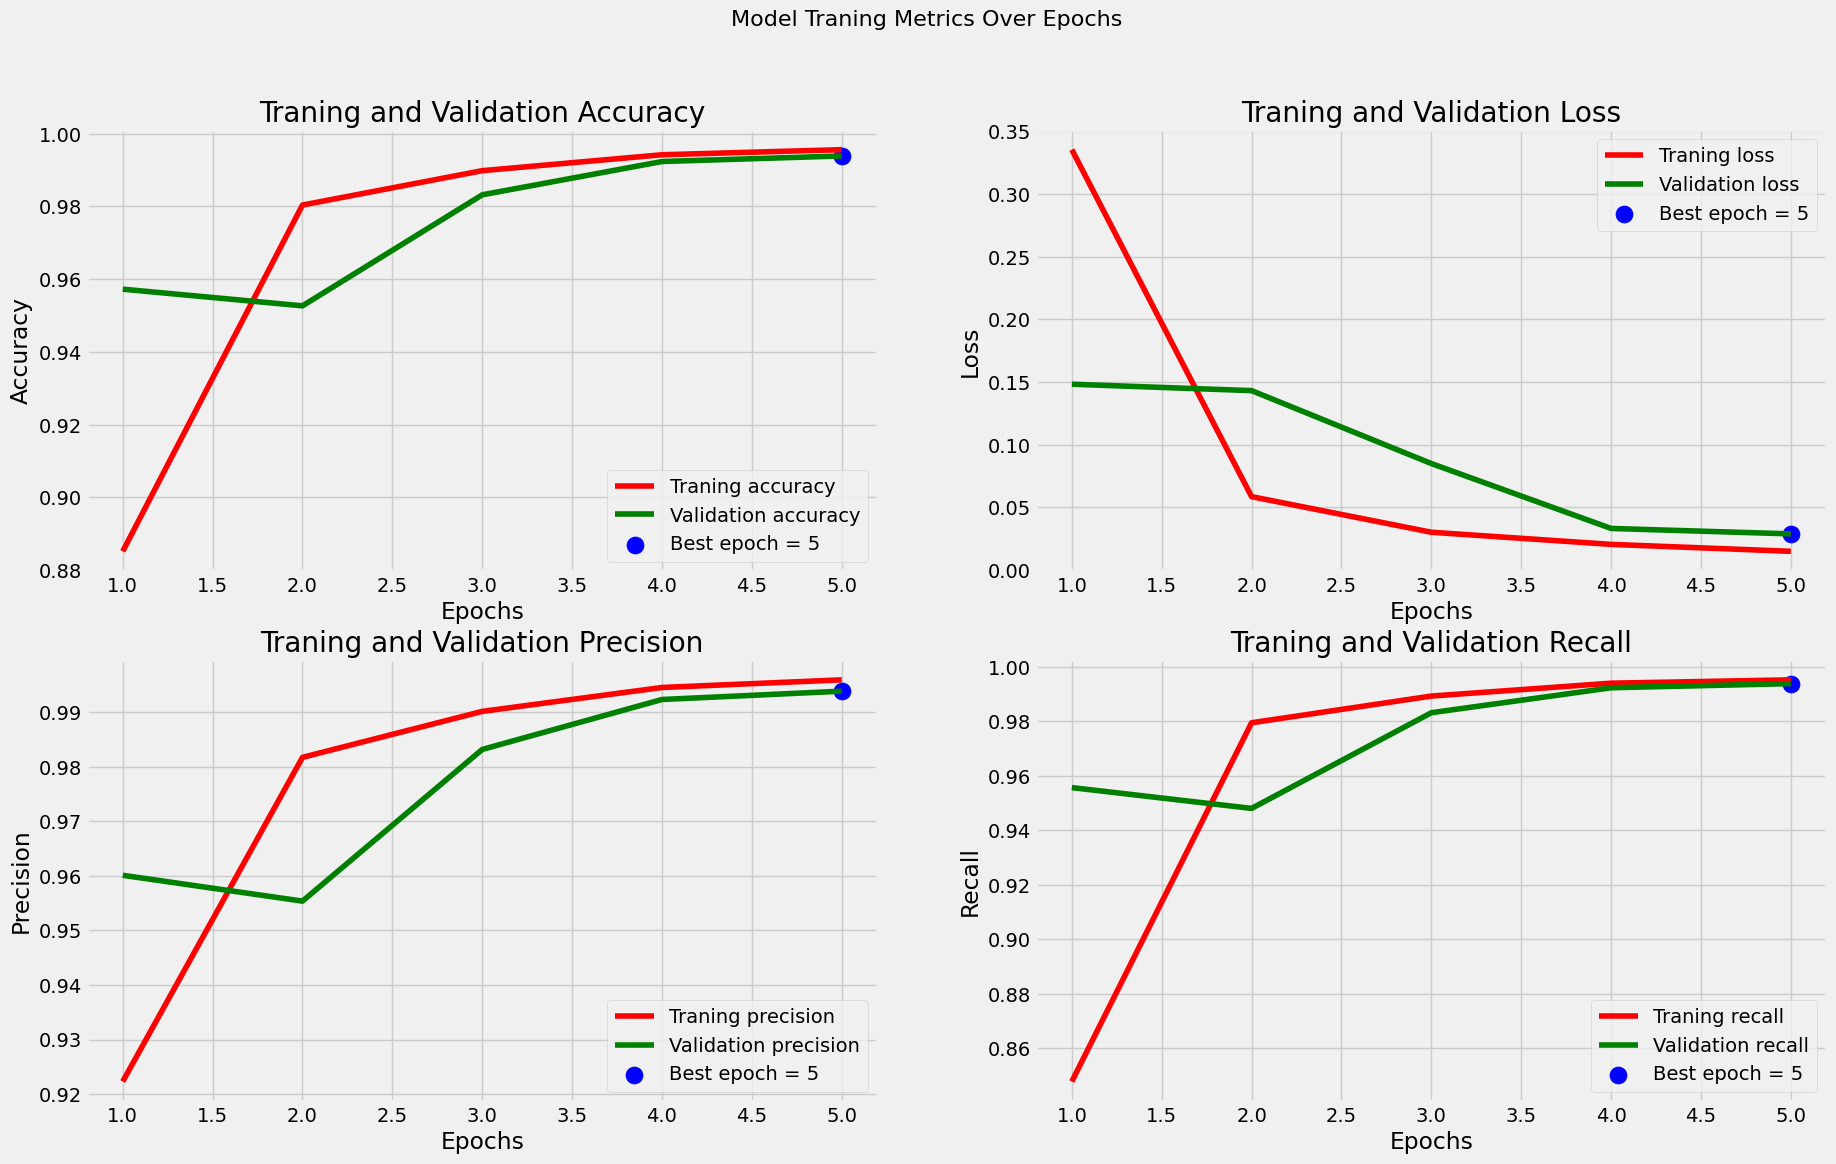

In [ ]:
# Getting training and validation metrics from history
metrics = ['accuracy', 'loss', 'precision', 'recall']
tr_metrics = {m: hist.history[m] for m in metrics}
val_metrics = {m: hist.history[f'val_{m}'] for m in metrics}

# Find best epochs and values
best_epochs = {}
best_values = {}
for m in metrics:
  if m == 'loss':
    idx = np.argmin(val_metrics[m])
  else:
    idx = np.argmax(val_metrics[m])
  best_epochs[m] = idx + 1
  best_values[m] = val_metrics[m][idx]

# Plot metrics
plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')

for i, metric in enumerate(metrics, 1):
  plt.subplot(2, 2, i)
  epochs = range(1, len(tr_metrics[metric]) + 1)

  plt.plot(epochs, tr_metrics[metric], 'r', label=f'Traning {metric}')
  plt.plot(epochs, val_metrics[metric], 'g', label=f'Validation {metric}')
  plt.scatter(best_epochs[metric], best_values[metric], s=150, c='blue',
              label=f'Best epoch = {best_epochs[metric]}')
  plt.title(f'Traning and Validation {metric.title()}')
  plt.xlabel('Epochs')
  plt.ylabel(metric.title())
  plt.legend()
  plt.grid(True)

plt.suptitle('Model Traning Metrics Over Epochs', fontsize=16)
plt.show()

In [ ]:
train_score = model.evaluate(tr_gen, verbose=1)
valid_score = model.evaluate(valid_gen, verbose=1)
test_score = model.evaluate(ts_gen, verbose=1)

print(f'Traning Accuracy: {train_score[1]*100:.2f}%')
print(f'Train Loss: {train_score[0]:.4f}')
print(f'\n\nValidation Accuracy: {valid_score[1]*100:.2f}%')
print(f'Validation Loss: {valid_score[0]:.4f}')
print(f'\n\nTest Accuracy: {test_score[1]*100:.2f}%')
print(f'Test Loss: {test_score[0]:.4f}')

179/179 ━━━━━━━━━━━━━━━━━━━━ 42s 234ms/step - accuracy: 0.9996 - loss: 0.0017 - precision: 0.9996 - recall: 0.9996
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 199ms/step - accuracy: 0.9891 - loss: 0.0416 - precision: 0.9891 - recall: 0.9891
 1/41 ━━━━━━━━━━━━━━━━━━━━ 6s 155ms/step - accuracy: 1.0000 - loss: 0.0013 - precision: 1.0000 - recall: 1.0000

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 163ms/step - accuracy: 0.9981 - loss: 0.0080 - precision: 0.9981 - recall: 0.9981
Traning Accuracy: 99.95%
Train Loss: 0.0017


Validation Accuracy: 99.24%
Validation Loss: 0.0303


Test Accuracy: 99.54%
Test Loss: 0.0152


41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 94ms/step


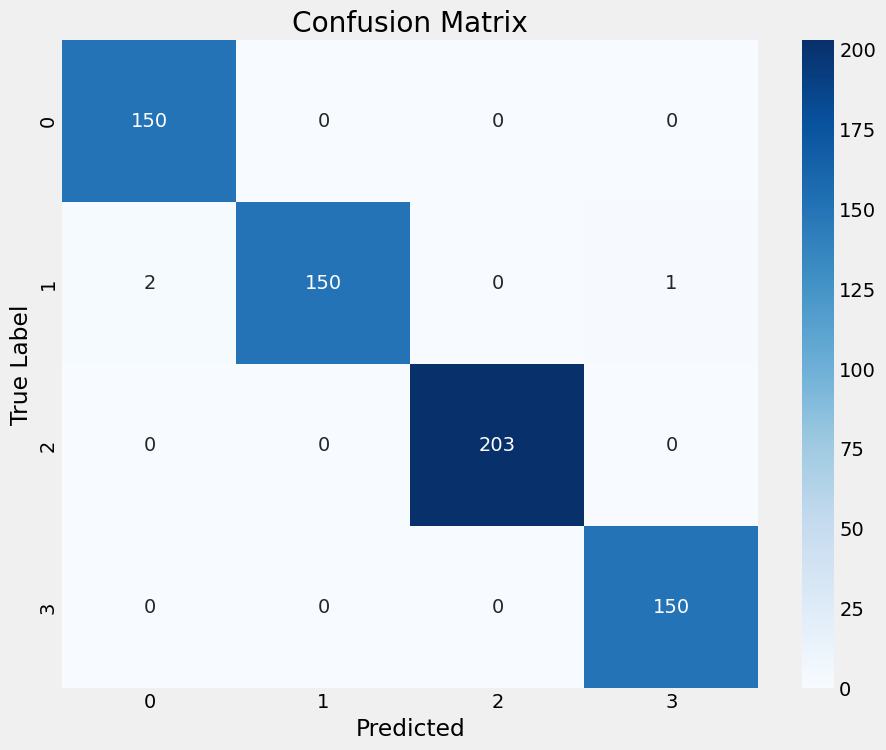

In [ ]:
# Confusion Matrix to see where models succeeds and fails
preds = model.predict(ts_gen)
y_pred = np.argmax(preds, axis=1)

class_dict = {
    0: 'glioma',
    1: 'meningioma',
    2: 'no_tumor',
    3: 'pituitary'
}

# Then create and display the confusion matrix
cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from PIL import Image

def predict(img_path: str) -> None:
  # Get class labels
  labels = list(class_dict.keys())

  # Create figure
  plt.figure(figsize=(6, 8))

  # Load and preprocess image
  img = Image.open(img_path)
  resized_img = img.resize((299, 299))
  img_array = np.array(resized_img)
  img_array = np.expand_dims(img_array, axis=0) / 255

  # Get model predictions
  predictions = model.predict(img_array)
  probabilities = list(predictions[0])

  # Get predicted class
  predicted_class_idx = np.argmax(probabilities)
  predicted_class = class_dict[predicted_class_idx]

  # Plot original image
  plt.subplot(2, 1, 1)
  plt.imshow(resized_img)
  plt.title(f'Input MRI Image\nPredicted: {predicted_class}')

  # Plot prediction probabilities
  plt.subplot(2, 1, 2)
  bars = plt.barh(labels, probabilities)
  plt.xlabel('Probability', fontsize=15)
  plt.title('Class Probabilities')

  # Add probability labels to bars
  ax = plt.gca()
  ax.bar_label(bars, fmt='%.2f')

  plt.tight_layout()
  plt.show()

  print(f'\n\nPredicted tumor type: {predicted_class}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


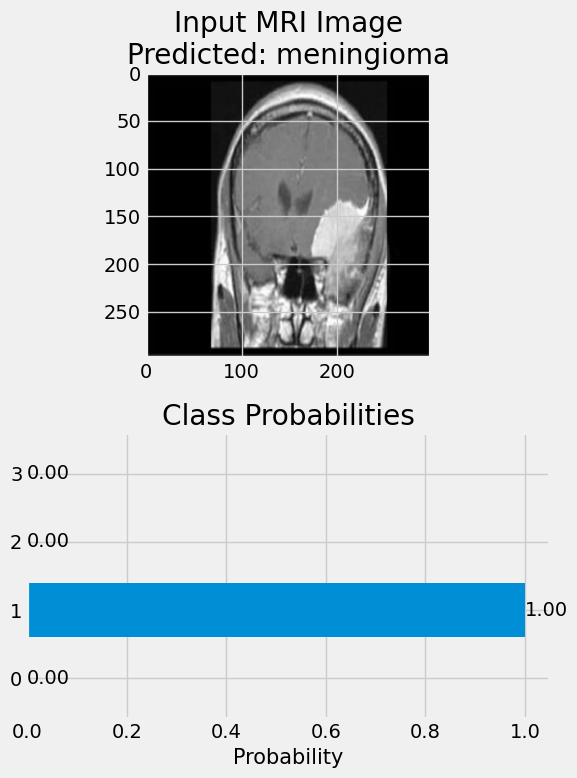



Predicted tumor type: meningioma


In [ ]:
predict("/content/Testing/meningioma/Te-meTr_0000.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


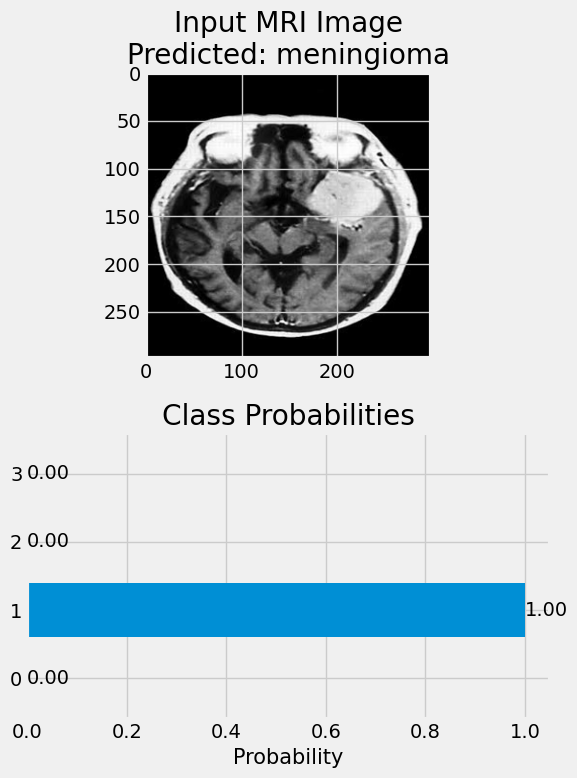



Predicted tumor type: meningioma


In [ ]:
predict("/content/Testing/meningioma/Te-meTr_0005.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


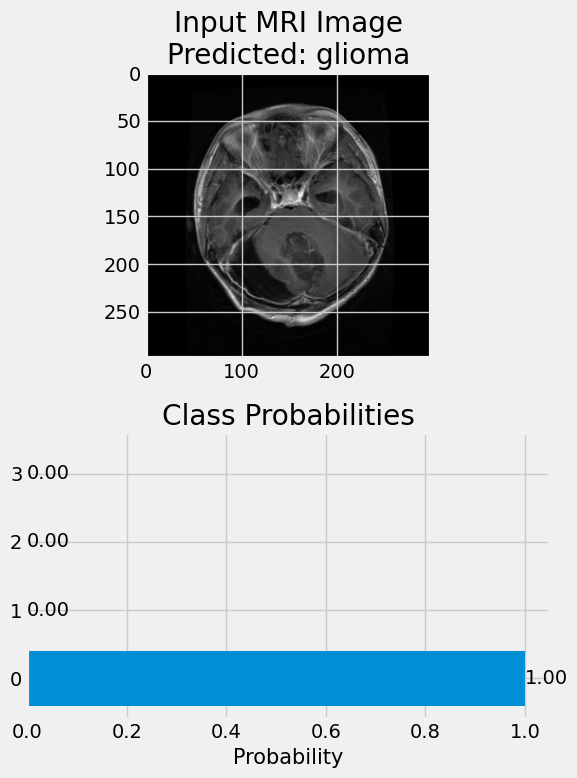



Predicted tumor type: glioma


In [ ]:
predict("/content/Testing/glioma/Te-glTr_0000.jpg")

In [ ]:
model.save_weights('xception_model.weights.h5')

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import regularizers

In [ ]:
# Standardize Image Size and Brightness to improve consistency.
batch_size = 16

img_size = (224, 224)

image_generator = ImageDataGenerator(rescale=1/255, brightness_range=(0.8, 1.2))

ts_gen = ImageDataGenerator(rescale=1/255)


# Takes Traning DF and creates flow of images from DF
tr_gen = image_generator.flow_from_dataframe(
    tr_df,
    x_col='Class Path',
    y_col='Class',
    batch_size=batch_size,
    target_size=img_size
)

# Keeping order of Testing Data consistent
ts_gen = ts_gen.flow_from_dataframe(
    ts_df,
    x_col='Class Path',
    y_col='Class',
    batch_size=16,
    target_size=img_size,
    shuffle=False
)

valid_gen = image_generator.flow_from_dataframe(
    valid_df,
    x_col='Class Path',
    y_col='Class',
    batch_size=batch_size,
    target_size=img_size
)

Found 5712 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.


In [ ]:
# Create a Sequential model

cnn_model = Sequential()

# Convolutional layers
cnn_model.add(Conv2D(512, (3, 3), padding='same', input_shape=(224, 224, 3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

cnn_model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output for fully connected layers
cnn_model.add(Flatten())

# Fully connected layers
cnn_model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
cnn_model.add(Dropout(0.35))

cnn_model.add(Dense(4, activation='softmax')) # Output layer with 4 neurons for the 4 classes

# Compile the model
cnn_model.compile(Adamax(learning_rate = 0.001), loss='categorical_crossentropy', metrics= ['accuracy', Precision(), Recall()])

# Display the model summary
cnn_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 224, 224, 512)       │          14,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 512)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 112, 112, 256)       │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 56, 56, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 56, 56, 128)         │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 28, 28, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       3,211,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,775,620 (18.22 MB)

 Trainable params: 4,775,620 (18.22 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = cnn_model.fit(
    tr_gen,
    epochs=5,
    validation_data=valid_gen
)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


357/357 ━━━━━━━━━━━━━━━━━━━━ 141s 331ms/step - accuracy: 0.5948 - loss: 2.1302 - precision_1: 0.7105 - recall_1: 0.4251 - val_accuracy: 0.8015 - val_loss: 0.8023 - val_precision_1: 0.8305 - val_recall_1: 0.7557
Epoch 2/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 103s 287ms/step - accuracy: 0.8051 - loss: 0.7136 - precision_1: 0.8324 - recall_1: 0.7760 - val_accuracy: 0.8580 - val_loss: 0.5548 - val_precision_1: 0.8730 - val_recall_1: 0.8397
Epoch 3/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 141s 284ms/step - accuracy: 0.8589 - loss: 0.5380 - precision_1: 0.8741 - recall_1: 0.8405 - val_accuracy: 0.8473 - val_loss: 0.4900 - val_precision_1: 0.8619 - val_recall_1: 0.8382
Epoch 4/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 103s 287ms/step - accuracy: 0.8848 - loss: 0.4553 - precision_1: 0.8948 - recall_1: 0.8732 - val_accuracy: 0.9038 - val_loss: 0.4065 - val_precision_1: 0.9094 - val_recall_1: 0.8885
Epoch 5/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 141s 285ms/step - accuracy: 0.9182 - loss: 0.3773 - precision_1: 0.9240 - recall_1: 0.9

In [ ]:
# Getting training and validation metrics from history
metrics = ['accuracy', 'loss', 'precision', 'recall']
tr_metrics = {m: history.history[m] for m in metrics}
val_metrics = {m: history.history[f'val_{m}'] for m in metrics}

# Find best epochs and values
best_epochs = {}
best_values = {}
for m in metrics:
  if m == 'loss':
    idx = np.argmin(val_metrics[m])
  else:
    idx = np.argmax(val_metrics[m])
  best_epochs[m] = idx + 1
  best_values[m] = val_metrics[m][idx]

# Plot metrics
plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')

for i, metric in enumerate(metrics, 1):
  plt.subplot(2, 2, i)
  epochs = range(1, len(tr_metrics[metric]) + 1)

  plt.plot(epochs, tr_metrics[metric], 'r', label=f'Traning {metric}')
  plt.plot(epochs, val_metrics[metric], 'g', label=f'Validation {metric}')
  plt.scatter(best_epochs[metric], best_values[metric], s=150, c='blue',
              label=f'Best epoch = {best_epochs[metric]}')
  plt.title(f'Traning and Validation {metric.title()}')
  plt.xlabel('Epochs')
  plt.ylabel(metric.title())
  plt.legend()
  plt.grid(True)

plt.suptitle('Model Traning Metrics Over Epochs', fontsize=16)
plt.show()

In [ ]:
train_score =  cnn_model.evaluate(tr_gen, verbose=1)
valid_score = cnn_model.evaluate(valid_gen, verbose=1)
test_score = cnn_model.evaluate(ts_gen, verbose=1)

print(f'Traning Accuracy: {train_score[1]*100:.2f}%')
print(f'Train Loss: {train_score[0]:.4f}')
print(f'\n\nValidation Accuracy: {valid_score[1]*100:.2f}%')
print(f'Validation Loss: {valid_score[0]:.4f}')
print(f'\n\nTest Accuracy: {test_score[1]*100:.2f}%')
print(f'Test Loss: {test_score[0]:.4f}')

In [ ]:
# Confusion Matrix to see where models succeeds and fails
preds = cnn_model.predict(ts_gen)
y_pred = np.argmax(preds, axis=1)

class_dict = {
    0: 'glioma',
    1: 'meningioma',
    2: 'no_tumor',
    3: 'pituitary'
}

# Then create and display the confusion matrix
cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
clr = classification_report(ts_gen.classes, y_pred)
print(clr)

In [ ]:
cnn_model.save("cnn_model.h5")